In [1]:
import ema as em
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg'

# Problem 1 - Modal Analysis

In [2]:
L = 1
Mass = 100
n = 8 # adjust number of nodes along beam

nf = 2+(n-2)*2
nt = 3*n-(n-1)
DOFs = [[nt-2, 0, 0] for i in range(n)]

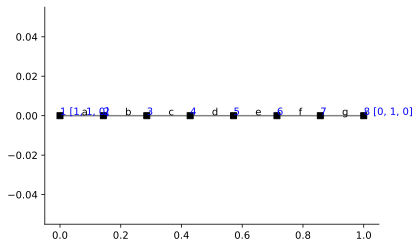

In [3]:
# Build Model
mdl = em.rModel(2,3)
nd = mdl.nodes

for i in range(n):
    if i == 0:
        mass = None
        DOFs[i][1] = nf+2
        DOFs[i][2] = nf-1
    elif i == n-1:
        mass = None
        DOFs[i][1] = nf+3
        DOFs[i][2] = nf     
    else:
        mass = Mass/(n-1)
        DOFs[i][1] = i
        DOFs[i][2] = i+(n-2)
        
    mdl.node(str(i+1), i*L/(n-1), 0.0, mass=mass)

mdl.girder(nd)

mdl.pin(nd[0])
mdl.fix(nd[-1], ['y'])

mdl.DOF = DOFs
fig, ax = plt.subplots()
em.plot_beam(mdl, ax)

In [4]:
# L = 1
# Mass = 100
# n2 = 4

# nf = 2+(n2-2)*2
# nt = 3*n2-(n2-1)
# DOFs = [[nt-2, 0, 0] for i in range(n2)]

# mdl2 = em.rModel(2,3)
# nd = mdl2.nodes

# for i in range(n2):
#     if i == 0:
#         mass = None
#         DOFs[i][1] = nf+2
#         DOFs[i][2] = nf-1
#     elif i == n-1:
#         mass = None
#         DOFs[i][1] = nf+3
#         DOFs[i][2] = nf     
#     else:
#         mass = Mass/(n2-1)
#         DOFs[i][1] = i
#         DOFs[i][2] = i+(n2-2)
        
#     mdl2.node(str(i+1), i*L/(n2-1), 0.0, mass=mass)

# mdl2.girder(nd)

# mdl2.pin(nd[0])
# mdl2.fix(nd[-1], ['y'])

# mdl2.DOF = DOFs

In [5]:
K = em.K_matrix(mdl)
M = em.Mass_matrix(mdl)

In [6]:
shapes = em.analysis.ModalAnalysis(mdl)
# shapes2 = em.analysis.ModalAnalysis(mdl2)

In [7]:
U = em.U_vector(em.A_matrix(mdl))

No handles with labels found to put in legend.


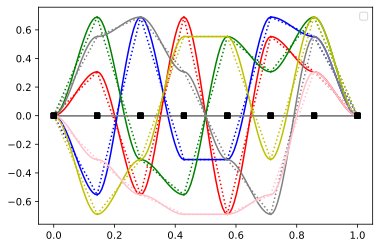

In [8]:
colors = ['r', 'b', 'g', 'y','grey','pink']
# fig, ax = plt.subplots()
for i, shape in enumerate(shapes[1]):
    U[0:n-2] = shape
    em.plot_modes(mdl, U, ax, color=colors[i], label=str(i+1))
plt.legend();